# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Import dataset
# Your code here
data = pd.read_csv("./data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
data = data.sample(5000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 5357 to 41485
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [6]:
# Let's take a look at first 5 rows ()
# Your code here
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31521,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12449,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39976,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [57]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
# Your code here
data['label'].value_counts()

1    591
7    556
8    499
3    498
6    492
9    491
0    484
5    467
2    466
4    456
Name: label, dtype: int64

In [28]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
from sklearn.model_selection import train_test_split
y = data['label'].values
X = data.drop(columns=['label']).values

In [29]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## 2. Visualization

Label: 1


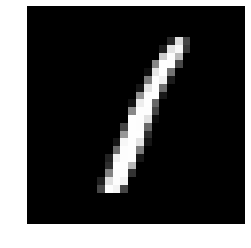

In [30]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
index = 36
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

## 3. Modeling

In [31]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()


In [32]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 4. Evaluate model

In [60]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
from sklearn.metrics import accuracy_score, confusion_matrix
rfc_y_predict = rfc.predict(X_test)
accuracy_score(y_test, rfc_y_predict) # Phải tính trên tập test
accuracy_score(y_train, rfc.predict(X_train))# Overfit

0.9984

In [61]:
# Decision Tree model
# Your code here
dtc_y_predict = dtc.predict(X_test)
accuracy_score(y_test, dtc_y_predict) # Phải tính trên tập test
accuracy_score(y_train, dtc.predict(X_train)) # Overfit

1.0

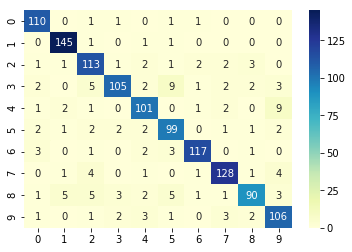

In [62]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here

rfc_confusion = confusion_matrix(y_true= y_test , y_pred=rfc_y_predict )
sns.heatmap(rfc_confusion, cmap="YlGnBu", annot=True, fmt="d" )
# Trên đường chéo là số lần đoán đúng, ngoài đường chéo là số lần đoán sai
# dòng là kết quả thực tế, cột là kết quả dự đoán. 
# ví dụ: ở vị trí [0,0] chúng ta đoán đúng 110 lần. Ở vị trí [3,5] chúng ta dự đoán sai (số 3 mà đoán thành số 5) tất cả 9 lần.

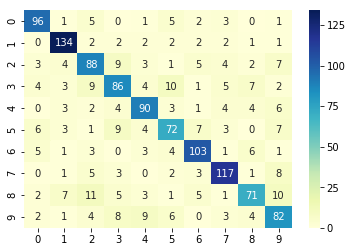

In [49]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here

dtc_confusion = confusion_matrix( y_true =y_test  ,y_pred = dtc_y_predict)
sns.heatmap(dtc_confusion, cmap="YlGnBu", annot=True, fmt="d" )

## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

[0.6816, 0.8256, 0.8776, 0.9144, 0.9176, 0.9256, 0.9304, 0.932]


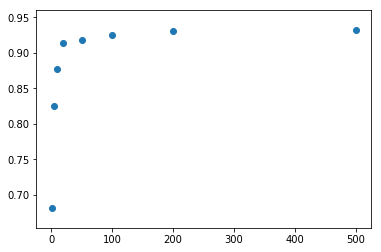

In [54]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier( n_estimators= i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_true = y_test , y_pred = predictions ))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(x = n , y = result)
print(result)

# GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV
params_grid = { 
    'n_estimators':[1,5,10, 20, 50, 100, 500],
    'max_depth' : [5,10, 20, 50]
}
# njobs: số lượng tiến trình máy tính muốn dùng để chạy: -1: chạy hết CPU
gridcv = GridSearchCV(RandomForestClassifier() , param_grid= params_grid , n_jobs =  6)
gridcv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'n_estimators': [1, 5, 10, 20, 50, 100, 500], 'max_depth': [5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
gridcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
gridcv.best_score_

0.9272

In [72]:
gridcv.best_params_

{'n_estimators': 500}

In [73]:
pd.DataFrame(gridcv.cv_results_)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.402505,0.042972,0.324475,0.041533,1,{'n_estimators': 1},0.664274,0.6736,0.602729,0.646933,0.031414,7,0.869391,0.8812,0.861422,0.870671,0.008125
1,0.468116,0.024425,0.011911,0.004743,5,{'n_estimators': 5},0.814195,0.8000,0.808989,0.807733,0.005867,6,0.986779,0.9868,0.986022,0.986534,0.000362
2,0.539278,0.010785,0.014714,0.005646,10,{'n_estimators': 10},0.876396,0.8552,0.861958,0.864533,0.008848,5,0.998397,0.9976,0.998403,0.998133,0.000377
3,0.682050,0.014588,0.029050,0.007621,20,{'n_estimators': 20},0.909888,0.8984,0.902889,0.903733,0.004731,4,1.000000,1.0000,0.999601,0.999867,0.000188
4,1.470388,0.003827,0.057245,0.006878,50,{'n_estimators': 50},0.907496,0.9088,0.915730,0.910667,0.003611,3,1.000000,1.0000,1.000000,1.000000,0.000000
5,2.420753,0.023176,0.115196,0.003407,100,{'n_estimators': 100},0.923445,0.9200,0.921348,0.921600,0.001419,2,1.000000,1.0000,1.000000,1.000000,0.000000
6,8.005827,0.224434,0.318635,0.015918,500,{'n_estimators': 500},0.929027,0.9240,0.928571,0.927200,0.002270,1,1.000000,1.0000,1.000000,1.000000,0.000000


## Great job!